In [1]:
import tensorflow as tf
import tensornets as nets

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\jvine\Anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-35574ad673d6>", line 1, in <module>
    import tensorflow as tf
  File "C:\Users\jvine\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\__init__.py", line 98, in <module>
    from tensorflow_core import *
  File "C:\Users\jvine\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow_core\__init__.py", line 40, in <module>
    from tensorflow.python.tools import module_util as _module_util
ModuleNotFoundError: No module named 'tensorflow.python.tools'; 'tensorflow.python' is not a package

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\jvine\Anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
Attribu

ModuleNotFoundError: No module named 'tensorflow.python.tools'; 'tensorflow.python' is not a package

In [ ]:
# ImageNet input image shape is (244, 244, 3)
inputs = tf.placeholder(tf.float32, [None, 224, 224, 3])

# Output is dependent on your situation (10 for CIFAR-10)
outputs = tf.placeholder(tf.float32, [None, 10])

# VGG19 returns the last layer (softmax)
# model to give the name
logits = nets.VGG19(inputs, is_training=True, classes=10)
model = tf.identity(logits, name='logits')

# loss function applied to the last layer
# train on the loss (Adam Optimizer is used)
loss = tf.losses.softmax_cross_entropy(outputs, logits)
train = tf.train.AdamOptimizer(learning_rate=1e-5).minimize(loss)

# for measuring accuracy after forward passing
correct_pred = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from sklearn import preprocessing

Remove previous weights, bias and inputs

In [11]:
tf.reset_default_graph()

AttributeError: module 'tensorflow' has no attribute 'reset_default_graph'

## Create a NN using TF to solve the CIFAR-10 Dataset using 2 layer fully connected layers and report your performance.

Initialize some constants

In [12]:
ALPHA = 1e-2
EPOCHS = 200
HL_1_NEURONS = 3

In [13]:
X = tf.placeholder(tf.float32, [None, len(std_X_train[0])])
y = tf.placeholder(tf.float32, [None, 10])

AttributeError: module 'tensorflow' has no attribute 'placeholder'

Initialize random weights

In [18]:
W1 = tf.Variable(tf.random_normal([len(std_X_train[0]), HL_1_NEURONS], stddev=1), name='W1')
b1 = tf.Variable(tf.random_normal([HL_1_NEURONS]), name='b1')

In [19]:
W2 = tf.Variable(tf.random_normal([HL_1_NEURONS, 10], stddev=1), name='W2')
b2 = tf.Variable(tf.random_normal([10]), name='b2')

Forward propagation with ReLU activation function

In [26]:
# Compute HL
hl = tf.nn.relu(tf.add(tf.matmul(X, W1), b1))
# Compute prediction
y_pred = tf.nn.softmax(tf.add(tf.matmul(hl, W2), b2))

Back propagation

In [21]:
loss = tf.losses.mean_squared_error(y_pred, y)
cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits=tf.add(tf.matmul(hl, W2), b2), labels=y_train_one_hot)
cost = tf.reduce_mean(cost_i)
optimizer = tf.train.GradientDescentOptimizer(ALPHA)
updates = optimizer.minimize(cost)

In [140]:
cost_list = []
batches = [std_X_1, std_X_2, std_X_3, std_X_4, std_X_5]
with tf.Session() as sess:
    for i in range
    # Initialize variables
    sess.run(tf.global_variables_initializer())
    # Train the model
    values = {X: std_X_train,
              y: y_train_one_hot}
    start = time.time()
    for e in range(EPOCHS):
        cost_val, _ = sess.run([cost, updates], feed_dict=values)
        cost_list.append(cost_val)
    stop = time.time()
    duration = stop-start
    pred = sess.run([y_pred], feed_dict={X: std_X_test, y: y_test_one_hot})

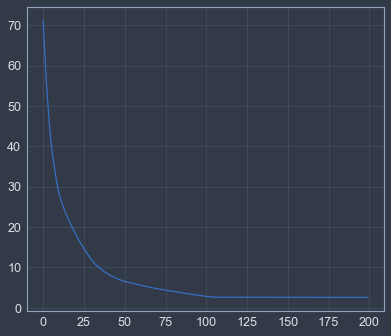

In [143]:
plt.plot(cost_list);

### What is the average runtime per epoch? 

In [144]:
avg_runtime = duration/EPOCHS
print(f'The average runtime per epoch is {avg_runtime} seconds')

The average runtime per epoch is 0.8272960317134858 seconds


### What is the number of parameters in the network? 

In [28]:
num_params = np.sum([np.product([xi.value for xi in x.get_shape()]) for x in tf.all_variables()])
print(f'The number of parameters in the network is {num_params}')

The number of parameters in the network is 9259


## Create a NN to solve the CIFAR-10 Dataset with the ‘le-net’ architecture shown in the presentation. Try to avoid code duplication as possible. 

In [43]:
std_X_train = std_X_train.reshape((len(std_X_train), 3, 32, 32)).transpose(0, 2, 3, 1)
std_X_test = std_X_test.reshape((len(std_X_test), 3, 32, 32)).transpose(0, 2, 3, 1)

In [44]:
ALPHA = 1e-2
EPOCHS = 200
HL_1_NEURONS = 3
HL_2_NEURONS = 3

In [45]:
X = tf.placeholder(tf.float32, [None, std_X_train.shape[1]])
y = tf.placeholder(tf.float32, [None, 10])

Initialize random weights

In [46]:
# Weight and bias for the first convolutional layer
WC1 = tf.Variable(tf.random_normal([5, 5, std_X_train.shape[1], 32], stddev=1), name='WC1')
bC1 = tf.Variable(tf.random_normal([32]), name='bC1')

# Weight and bias for the second convolutional layer
WC2 = tf.Variable(tf.random_normal([5, 5, 32, 64], stddev=1), name='WC2')
bC2 = tf.Variable(tf.random_normal([64]), name='bC2')

# Weight and bias for the first fully conected layer
WFC1 = tf.Variable(tf.random_normal([64*5*5, HL_1_NEURONS], stddev=1), name='WFC1')
bFC1 = tf.Variable(tf.random_normal([HL_1_NEURONS]), name='bFC1')

# Weight and bias for the second fully conected layer
WFC2 = tf.Variable(tf.random_normal([HL_1_NEURONS, HL_2_NEURONS], stddev=1), name='WFC2')
bFC2 = tf.Variable(tf.random_normal([HL_2_NEURONS]), name='bFC2')

# Weight and bias for the third fully conected layer
WFC3 = tf.Variable(tf.random_normal([HL_2_NEURONS, 10], stddev=1), name='WFC3')
bFC3 = tf.Variable(tf.random_normal([10]), name='bFC3')

Convolutional layers

In [49]:
# Compute first convolutional layer
C_1 = tf.nn.conv2d(X, WC1, strides=1, padding='SAME')
C_1 = tf.nn.bias_add(C_1, bC1)
C_1 = tf.nn.relu(C_1)
P_1 = tf.nn.max_pool(C_1, ksize=3, strides=1, padding='same')

# Compute second convolutional layer
C_2 = tf.nn.conv2d(P_1, WC2, strides=1, padding='same')
C_2 = tf.nn.bias_add(C_2, bC2)
C_2 = tf.nn.relu(C_2)
P_2 = tf.nn.max_pool(C_2, ksize=3, strides=1, padding='same')

ValueError: Shape must be rank 4 but is rank 2 for 'Conv2D_2' (op: 'Conv2D') with input shapes: [?,32], [5,5,32,32].

Fully connected layers

In [ ]:
# Compute first HL (use dropout in order to avoid overfitting)
hl1 = tf.nn.relu(tf.add(tf.matmul(P2, WFC1), bFC1))
hl1 = tf.nn.dropout(hl, 0.25)

# Compute second HL (use dropout in order to avoid overfitting)
hl2 = tf.nn.relu(tf.add(tf.matmul(hl1, WFC2), bFC2))
hl2 = tf.nn.dropout(hl2, 0.25)

# Compute prediction
y_pred = tf.nn.softmax(tf.add(tf.matmul(hl2, WFC3), bFC3))

Calculate loss/cost and update weights

In [ ]:
loss = tf.losses.mean_squared_error(y_pred, y)
cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits=tf.add(tf.matmul(hl, W2), b2), labels=y_train_one_hot)
cost = tf.reduce_mean(cost_i)
optimizer = tf.train.GradientDescentOptimizer(ALPHA)
updates = optimizer.minimize(cost)

Run the model

In [ ]:
cost_list = []
batches = [std_X_1, std_X_2, std_X_3, std_X_4, std_X_5]
with tf.Session() as sess:
    for i in range
    # Initialize variables
    sess.run(tf.global_variables_initializer())
    # Train the model
    values = {X: std_X_train,
              y: y_train_one_hot}
    start = time.time()
    for e in range(EPOCHS):
        cost_val, _ = sess.run([cost, updates], feed_dict=values)
        cost_list.append(cost_val)
    stop = time.time()
    duration = stop-start
    pred = sess.run([y_pred], feed_dict={X: std_X_test, y: y_test_one_hot})

In [ ]:
# LeNet-5 architecture implementation using TensorFlow
def LeNet_5(x):
 
 # Layer 1 : Convolutional Layer. Input = 32x32x1, Output = 28x28x1.
 conv1_w = tf.Variable(tf.truncated_normal(shape = [5,5,1,6],mean = 0, stddev = 0.1))
 conv1_b = tf.Variable(tf.zeros(6))
 conv1 = tf.nn.conv2d(x,conv1_w, strides = [1,1,1,1], padding = ‘VALID’) + conv1_b 
 # TODO: Activation.
 conv1 = tf.nn.relu(conv1)
 
 # Pooling Layer. Input = 28x28x1. Output = 14x14x6.
 pool_1 = tf.nn.max_pool(conv1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = ‘VALID’)
 
 
 # TODO: Layer 2: Convolutional. Output = 10x10x16.
 conv2_w = tf.Variable(tf.truncated_normal(shape = [5,5,6,16], mean = 0, stddev = 0.1))
 conv2_b = tf.Variable(tf.zeros(16))
 conv2 = tf.nn.conv2d(pool_1, conv2_w, strides = [1,1,1,1], padding = ‘VALID’) + conv2_b
 # TODO: Activation.
 conv2 = tf.nn.relu(conv2)
# TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
 pool_2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = ‘VALID’)
 
 
 # TODO: Flatten. Input = 5x5x16. Output = 400.
 fc1 = flatten(pool_2)
 
 
 # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
 fc1_w = tf.Variable(tf.truncated_normal(shape = (400,120), mean = 0, stddev = 0.1))
 fc1_b = tf.Variable(tf.zeros(120))
 fc1 = tf.matmul(fc1,fc1_w) + fc1_b
 
 # TODO: Activation.
 fc1 = tf.nn.relu(fc1)
 
 # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
 fc2_w = tf.Variable(tf.truncated_normal(shape = (120,84), mean = 0, stddev = 0.1))
 fc2_b = tf.Variable(tf.zeros(84))
 fc2 = tf.matmul(fc1,fc2_w) + fc2_b
 # TODO: Activation.
 fc2 = tf.nn.relu(fc2)
 
 # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
 fc3_w = tf.Variable(tf.truncated_normal(shape = (84,10), mean = 0 , stddev = 0.1))
 fc3_b = tf.Variable(tf.zeros(10))
 logits = tf.matmul(fc2, fc3_w) + fc3_b
 return logits